#**Simple ANN (Art. Neural Net) with Functions for Stock Price Prediction**

C Kaligotla

Feb 03, 2025

Note: This is time series data - Refer Class Slides for more details

Reference: Adopted from Dr. Frederick's code




## Preamble

In [12]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

## Constants and Inputs

In [14]:
# Constants
STOCK_SYMBOL = 'AAPL'
START_DATE = '2024-03-01'
END_DATE = '2025-03-01'
LOOKBACK_PERIOD = 20
EPOCHS = 20

## Data Processing Functions
=================

In [15]:
# Data Processing Functions
# =================

def download_stock_data(stock, start, end):
    """Download stock closing prices using yfinance."""
    try:
        data = yf.download(stock, start=start, end=end)
        return data['Close'].values.reshape(-1, 1)
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None


def prepare_dataset(data, lookback):
    """Transform data into input and target datasets for training."""
    dataX, dataY = [], []
    for i in range(len(data) - lookback - 1):
        dataX.append(data[i:(i + lookback), 0])
        dataY.append(data[i + lookback, 0])
    return np.array(dataX), np.array(dataY)


## Model Initialization & Training Function
================================

In [16]:
# Model Initialization & Training Function
# ================================

def initialize_model(input_dim):
    """Initialize and compile the neural network model."""
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

## Visualization Function

In [17]:
# Visualization Function
# ==============

def plot_combined_actual_vs_predicted(train_actual, train_predicted, test_actual, test_predicted, title):
    """Plot actual vs predicted stock prices and their difference."""
    plt.figure(figsize=(15, 6))

    combined_actual = np.concatenate([train_actual, test_actual], axis=0)
    combined_predicted = np.concatenate([train_predicted, test_predicted], axis=0)
    difference = combined_actual.ravel() - combined_predicted.ravel()

    # Main plot for actual and predicted prices
    plt.plot(combined_actual, label="Actual Prices", color="blue")
    plt.plot(combined_predicted, label="Predicted Prices", color="red", alpha=0.7)

    # Add a vertical line to indicate separation between training and test sets
    plt.axvline(x=len(train_actual), color='gray', linestyle='--', label='Train-Test Boundary')

    # Set labels for the main y-axis
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend(loc='upper left')
    plt.grid(True)

    # Create a secondary y-axis for difference values
    ax2 = plt.gca().twinx()
    ax2.plot(difference, label="Difference", color="green", linestyle='--', alpha=0.7)

    # Label the secondary y-axis
    ax2.set_ylabel('Difference Between Actual and Predicted', color='green')
    ax2.legend(loc='upper right')
    ax2.tick_params(axis='y', labelcolor='green')

    plt.show()

## MAIN

[*********************100%***********************]  1 of 1 completed

Epoch 1/20


179/179 [==============================] - 1s 750us/step - loss: 0.0180
Epoch 2/20
179/179 [==============================] - 0s 748us/step - loss: 0.0054
Epoch 3/20
179/179 [==============================] - 0s 692us/step - loss: 0.0039
Epoch 4/20
179/179 [==============================] - 0s 798us/step - loss: 0.0038
Epoch 5/20
179/179 [==============================] - 0s 821us/step - loss: 0.0038
Epoch 6/20
179/179 [==============================] - 0s 765us/step - loss: 0.0030
Epoch 7/20
179/179 [==============================] - 0s 759us/step - loss: 0.0040
Epoch 8/20
179/179 [==============================] - 0s 714us/step - loss: 0.0043
Epoch 9/20
179/179 [==============================] - 0s 731us/step - loss: 0.0028
Epoch 10/20
179/179 [==============================] - 0s 794us/step - loss: 0.0040
Epoch 11/20
179/179 [==============================] - 0s 810us/step - loss: 0.0035
Epoch 12/20
179/179 [==============================] - 0s 798us/step - loss: 0.0033
Epoch 13/20


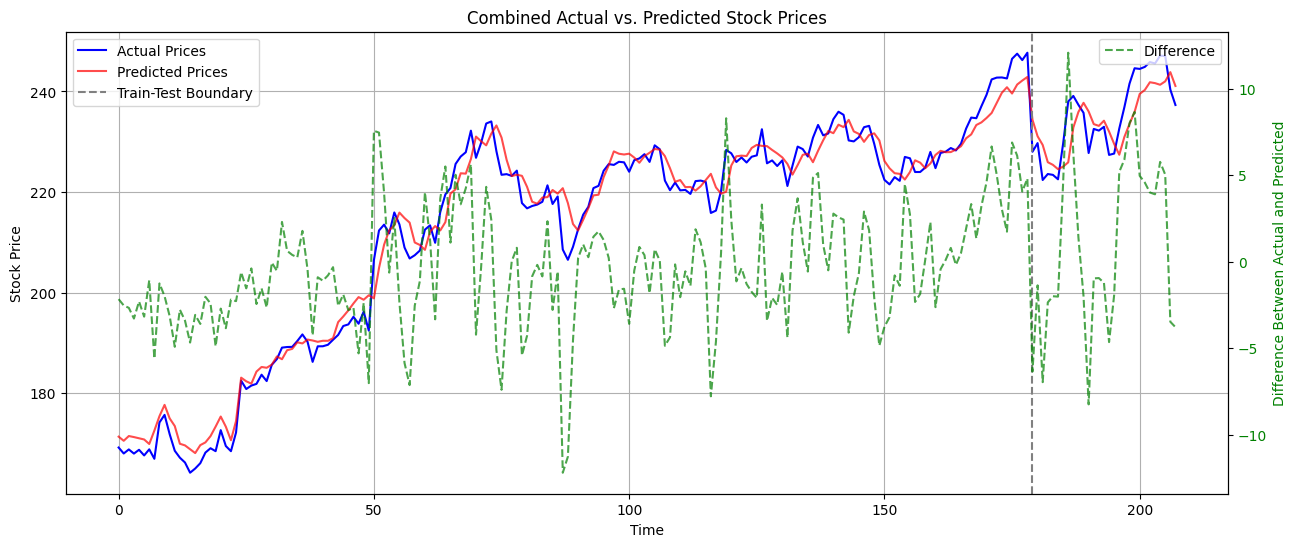

In [18]:

# Main Execution
# ================

if __name__ == "__main__":
    data = download_stock_data(STOCK_SYMBOL, START_DATE, END_DATE)

    if data is not None:
        scaler = MinMaxScaler(feature_range=(0, 1))

        # Split the dataset before scaling to avoid data leakage
        train_size = int(len(data) * 0.8)
        data_train = data[:train_size]
        data_test = data[train_size:]

        # Fit the scaler on training data and transform both training and test data
        scaler.fit(data_train)
        data_train_scaled = scaler.transform(data_train)
        data_test_scaled = scaler.transform(data_test)

        X_train, y_train = prepare_dataset(data_train_scaled, LOOKBACK_PERIOD)
        X_test, y_test = prepare_dataset(data_test_scaled, LOOKBACK_PERIOD)

        model = initialize_model(LOOKBACK_PERIOD)
        model.fit(X_train, y_train, epochs=EPOCHS, batch_size=1, verbose=1)

        # Make predictions and revert scaling
        train_predict = scaler.inverse_transform(model.predict(X_train))
        y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1))
        test_predict = scaler.inverse_transform(model.predict(X_test))
        y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Evaluate and print performance metric
        mse = mean_squared_error(y_test_original, test_predict)
        print(f"Mean Squared Error on Test Data: {mse:.2f}")

        plot_combined_actual_vs_predicted(y_train_original, train_predict, y_test_original, test_predict,
                                          "Combined Actual vs. Predicted Stock Prices")
